### Exploratory Data Analysis

In [65]:
# Load packages and functions

import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

from data_preprocessing import load_demographics, load_referendum, merge_demographics_referendum

In [62]:
# Load data

demographics_filepath = "../data/demographics_2021.csv"
face_covering_filepath = "data/face_covering.csv"

demographics = load_demographics(demographics_filepath)
face_covering = load_referendum(face_covering_filepath)
merged_data = merge_demographics_referendum(demographics, face_covering)

[Text(0.5, 1.0, 'Histogram - % Yes')]

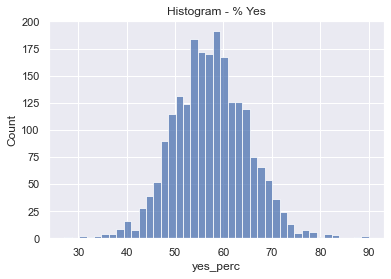

In [73]:
# Histogram of referendum results
sns.histplot(data=face_covering, x="yes_perc").set(title='Histogram - % Yes')

In [75]:
# Frequency table of Yes-No votes
yes_perc_dummy = 0 if face_covering.yes_perc < 0.5 else 1
yes_perc_dummy

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [5]:
# Summary statistics for demographic data
demographics.describe().T

,count,mean,std,min,25%,50%,75%,max
population,2172.0,3962.261971,12875.284703,32.0,720.2500,1555.50,3834.250,420217.0
population_variation,2172.0,9.209899,11.342446,-30.3,2.4000,7.95,14.400,92.8
population_density,2172.0,437.707643,792.787000,1.0,80.7500,185.00,467.000,12811.0
foreigner_percentage,2172.0,16.947744,9.702113,0.0,9.6000,15.20,23.125,57.8
age_percentage_less_20,2172.0,20.471455,3.367026,2.1,18.7000,20.60,22.500,37.2
age_percentage_between_20_64,2172.0,60.154880,3.197797,39.5,58.3000,60.25,62.200,81.1
age_percentage_more_64,2172.0,19.374540,4.413891,6.5,16.4000,19.00,21.600,40.3
marriage_rate,2172.0,4.168692,2.590607,0.0,2.8000,4.00,5.200,36.7
divorce_rate,2172.0,1.918692,1.762745,0.0,1.0000,1.80,2.500,38.5
birth_rate,2172.0,9.224401,3.879388,0.0,7.0000,9.30,11.200,47.0


In [6]:
# Summary statistics for referendum data
face_covering.describe().T

,count,mean,std,min,25%,50%,75%,max
canton_id,2179.0,13.704452,8.458174,1.0,3.0,17.0,22.0,26.0
registered_voters,2179.0,2522.651675,7173.123155,30.0,530.0,1099.0,2563.5,234028.0
cast_ballots,2179.0,1297.025241,3874.621587,17.0,277.5,576.0,1310.0,128959.0
participation_rate,2179.0,53.257458,9.361085,19.5,46.8,52.1,58.9,94.2
blank_votes,2179.0,13.356586,48.254538,0.0,2.0,5.0,12.0,1203.0
invalid_votes,2179.0,4.139514,13.116165,0.0,0.0,0.0,2.0,202.0
valid_ballots,2179.0,1279.529142,3828.651792,16.0,275.5,568.0,1298.5,127806.0
yes,2179.0,655.045434,1393.930347,9.0,163.0,331.0,720.5,39255.0
no,2179.0,624.483708,2488.276033,4.0,110.0,241.0,560.0,88551.0
yes_perc,2179.0,57.332171,7.672309,27.1,52.2,57.2,62.3,90.0


In [8]:
# Relevant features for correlation graphs
features = ['population', 'population_variation',
       'population_density', 'foreigner_percentage', 'age_percentage_less_20',
       'age_percentage_between_20_64', 'age_percentage_more_64',
       'marriage_rate', 'divorce_rate', 'birth_rate', 'death_rate',
       'private_households', 'avg_household_size', 'total_surface',
       'housing_and_infrastructure_surface',
       'housing_and_infrastructure_surface_variation',
       'agriculture_surface_perc', 'agriculture_variation_surface_perc',
       'forest_surface_perc', 'unproductive_surface_perc', 'employment_total',
       'employment_primary', 'employment_secondary', 'employment_tertiary',
       'establishments_total', 'establishments_primary',
       'establishments_secondary', 'establishments_tertiary',
       'empty_housing_units', 'new_housing_units_per_capita',
       'social_aid_perc', 'PLR', 'PDC', 'PS', 'UDC', 'PEV_PCS', 'PVL', 'PBD',
       'PST_Sol', 'PES', 'small_right_parties','registered_voters', 'cast_ballots',
       'participation_rate']

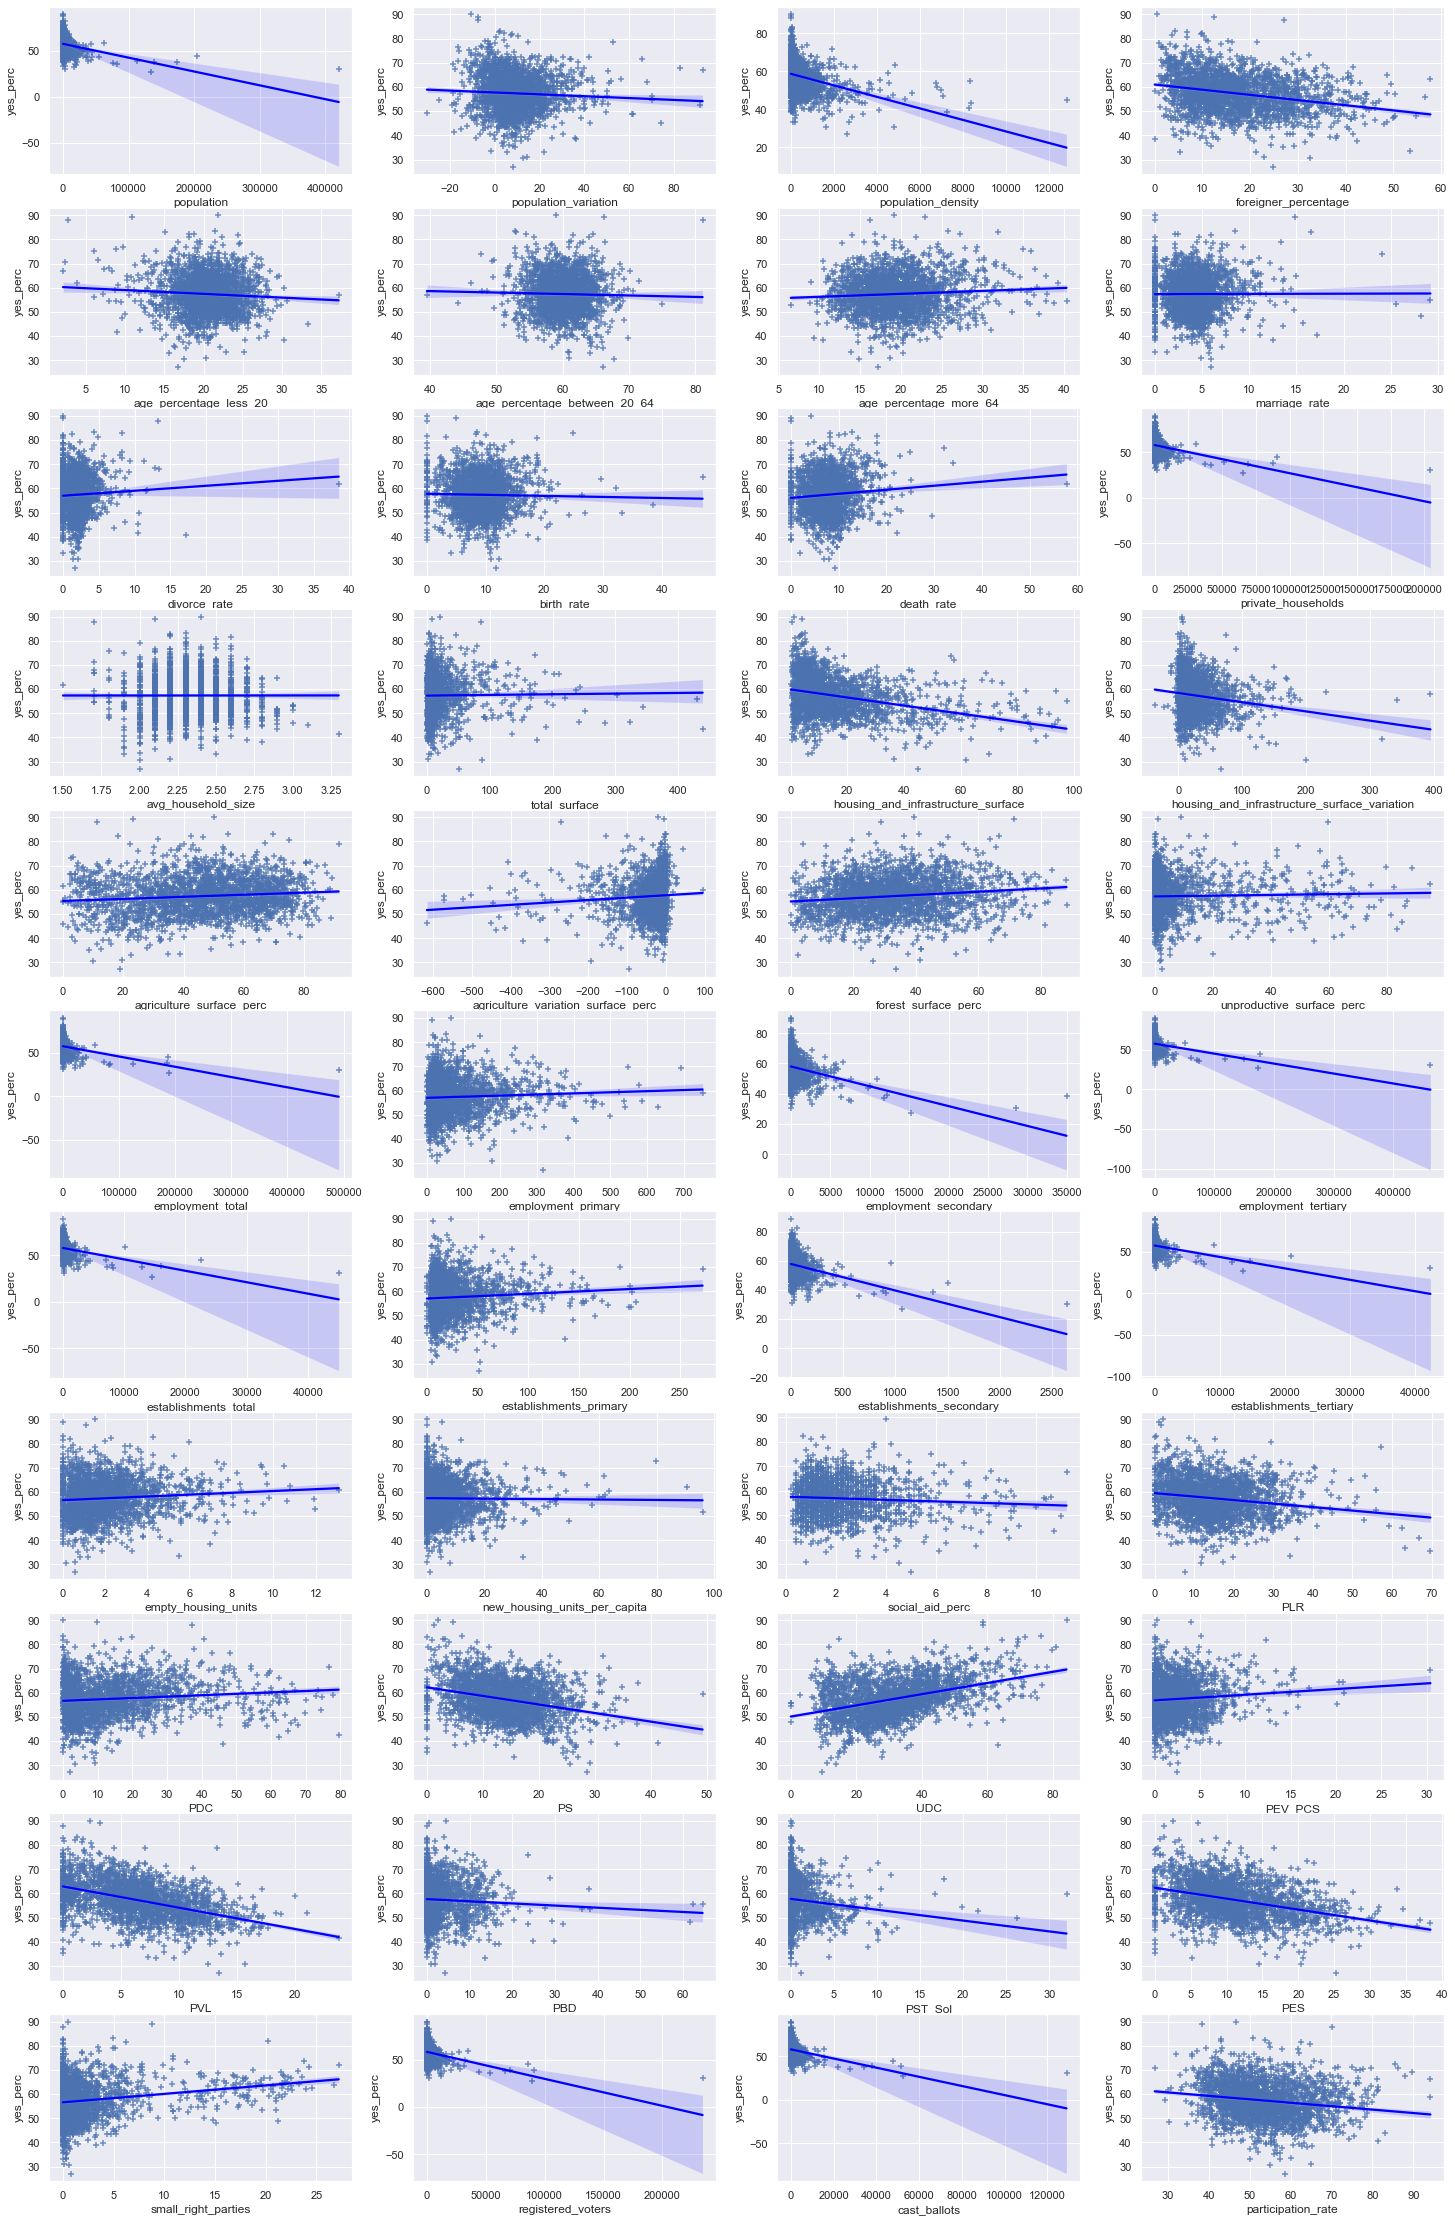

In [71]:
# Scaterplots of features v. the outcome variable

fig, axs = plt.subplots(11, 4, figsize=(25,40))
row, col = 0, 0
maxcol = 3

for i, feature in enumerate(features):
    sns.regplot(data=merged_data, y="yes_perc", x=feature, marker="+",
        line_kws={"color": "blue"}, ax=axs[row, col])
    if col == maxcol:
        col = 0
        row += 1
    else:
        col +=1